In [1]:
# import all the necessary libaries
from bs4 import BeautifulSoup
import os
import requests
import glob
import pandas as pd

In [2]:
import unicodedata

In [3]:
df1 = pd.read_csv("bestofrt.tsv",sep='\t')

In [4]:
# rotten tomatoes top 100 movies
df1.head()

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370


In [5]:
# Webscraping
# Webscrape rotten tomatoes site to get the movie title, audience score and number of audience ratings

# List of dictionaries to build file by file and later convert to a DataFrame
df2_list = []

# folder where the movie webpages are saved
folder = 'C:\\Users\\user\\Desktop\\UDACITY\\Greatest_Movies\\rt_html'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html)) as file:
        soup = BeautifulSoup(file,"lxml")
        title = soup.find('title').text
        title = unicodedata.normalize("NFKD",title)
        audience_score = soup.find(name='div',class_='meter-value').find(name='span',class_='superPageFontColor').text[:-1]
        num_audience_ratings = soup.find('div', class_='audience-info hidden-xs superPageFontColor')
    
        num_audience_ratings = num_audience_ratings.find_all('div')[1].contents[2].strip().replace(',', '')
        
        # Append to list of dictionaries
        df2_list.append({'title': title,
                        'audience_score': int(audience_score),
                        'number_of_audience_ratings': int(num_audience_ratings)})
        
# convert list of dictionaries to dataframe       
df2 = pd.DataFrame(df2_list, columns = ['title', 'audience_score', 'number_of_audience_ratings'])

In [6]:
df2.head()

,title,audience_score,number_of_audience_ratings
0,12 Angry Men (Twelve Angry Men) (1957) - Rotte...,97,103672
1,The 39 Steps (1935) - Rotten Tomatoes,86,23647
2,The Adventures of Robin Hood (1938) - Rotten T...,89,33584
3,All About Eve (1950) - Rotten Tomatoes,94,44564
4,All Quiet on the Western Front (1930) - Rotten...,89,17768


In [7]:
df2.shape

(100, 3)

In [8]:
df2.title[0]

'12 Angry Men (Twelve Angry Men) (1957) - Rotten Tomatoes'

In [9]:
folder_name = 'ebert_reviews'
if not os.path.exists(folder_name):
    os.makedirs(folder_name) # creates the directory ebert_reviews if it doesn't exist

In [10]:
ebert_review_urls = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9900_1-the-wizard-of-oz-1939-film/1-the-wizard-of-oz-1939-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_2-citizen-kane/2-citizen-kane.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_3-the-third-man/3-the-third-man.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_4-get-out-film/4-get-out-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_5-mad-max-fury-road/5-mad-max-fury-road.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_6-the-cabinet-of-dr.-caligari/6-the-cabinet-of-dr.-caligari.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_7-all-about-eve/7-all-about-eve.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_8-inside-out-2015-film/8-inside-out-2015-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_9-the-godfather/9-the-godfather.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_10-metropolis-1927-film/10-metropolis-1927-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_11-e.t.-the-extra-terrestrial/11-e.t.-the-extra-terrestrial.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_12-modern-times-film/12-modern-times-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_14-singin-in-the-rain/14-singin-in-the-rain.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_15-boyhood-film/15-boyhood-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_16-casablanca-film/16-casablanca-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_17-moonlight-2016-film/17-moonlight-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_18-psycho-1960-film/18-psycho-1960-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_19-laura-1944-film/19-laura-1944-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_20-nosferatu/20-nosferatu.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_21-snow-white-and-the-seven-dwarfs-1937-film/21-snow-white-and-the-seven-dwarfs-1937-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_22-a-hard-day27s-night-film/22-a-hard-day27s-night-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_23-la-grande-illusion/23-la-grande-illusion.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_25-the-battle-of-algiers/25-the-battle-of-algiers.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_26-dunkirk-2017-film/26-dunkirk-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_27-the-maltese-falcon-1941-film/27-the-maltese-falcon-1941-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_29-12-years-a-slave-film/29-12-years-a-slave-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_30-gravity-2013-film/30-gravity-2013-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_31-sunset-boulevard-film/31-sunset-boulevard-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_32-king-kong-1933-film/32-king-kong-1933-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_33-spotlight-film/33-spotlight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_34-the-adventures-of-robin-hood/34-the-adventures-of-robin-hood.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_35-rashomon/35-rashomon.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_36-rear-window/36-rear-window.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_37-selma-film/37-selma-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_38-taxi-driver/38-taxi-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_39-toy-story-3/39-toy-story-3.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_40-argo-2012-film/40-argo-2012-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_41-toy-story-2/41-toy-story-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_42-the-big-sick/42-the-big-sick.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_43-bride-of-frankenstein/43-bride-of-frankenstein.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_44-zootopia/44-zootopia.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_45-m-1931-film/45-m-1931-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_46-wonder-woman-2017-film/46-wonder-woman-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_48-alien-film/48-alien-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_49-bicycle-thieves/49-bicycle-thieves.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_50-seven-samurai/50-seven-samurai.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_51-the-treasure-of-the-sierra-madre-film/51-the-treasure-of-the-sierra-madre-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_52-up-2009-film/52-up-2009-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_53-12-angry-men-1957-film/53-12-angry-men-1957-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_54-the-400-blows/54-the-400-blows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_55-logan-film/55-logan-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_57-army-of-shadows/57-army-of-shadows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_58-arrival-film/58-arrival-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_59-baby-driver/59-baby-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_60-a-streetcar-named-desire-1951-film/60-a-streetcar-named-desire-1951-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_61-the-night-of-the-hunter-film/61-the-night-of-the-hunter-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_62-star-wars-the-force-awakens/62-star-wars-the-force-awakens.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_63-manchester-by-the-sea-film/63-manchester-by-the-sea-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_64-dr.-strangelove/64-dr.-strangelove.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_66-vertigo-film/66-vertigo-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_67-the-dark-knight-film/67-the-dark-knight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_68-touch-of-evil/68-touch-of-evil.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_69-the-babadook/69-the-babadook.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_72-rosemary27s-baby-film/72-rosemary27s-baby-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_73-finding-nemo/73-finding-nemo.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_74-brooklyn-film/74-brooklyn-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_75-the-wrestler-2008-film/75-the-wrestler-2008-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_77-l.a.-confidential-film/77-l.a.-confidential-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_78-gone-with-the-wind-film/78-gone-with-the-wind-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_79-the-good-the-bad-and-the-ugly/79-the-good-the-bad-and-the-ugly.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_80-skyfall/80-skyfall.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_82-tokyo-story/82-tokyo-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_83-hell-or-high-water-film/83-hell-or-high-water-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_84-pinocchio-1940-film/84-pinocchio-1940-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_85-the-jungle-book-2016-film/85-the-jungle-book-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991a_86-la-la-land-film/86-la-la-land-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_87-star-trek-film/87-star-trek-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_89-apocalypse-now/89-apocalypse-now.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_90-on-the-waterfront/90-on-the-waterfront.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_91-the-wages-of-fear/91-the-wages-of-fear.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_92-the-last-picture-show/92-the-last-picture-show.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_93-harry-potter-and-the-deathly-hallows-part-2/93-harry-potter-and-the-deathly-hallows-part-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_94-the-grapes-of-wrath-film/94-the-grapes-of-wrath-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_96-man-on-wire/96-man-on-wire.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_97-jaws-film/97-jaws-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_98-toy-story/98-toy-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_99-the-godfather-part-ii/99-the-godfather-part-ii.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_100-battleship-potemkin/100-battleship-potemkin.txt']

In [11]:
# This saves the reviews locally on our system
for url in ebert_review_urls:
    response = requests.get(url)
    with open (os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
        file.write(response.content)

In [12]:
response

<Response [200]>

In [13]:
os.listdir(folder_name) # returns a list of all files in folder_name

['1-the-wizard-of-oz-1939-film.txt',
 '10-metropolis-1927-film.txt',
 '100-battleship-potemkin.txt',
 '11-e.t.-the-extra-terrestrial.txt',
 '12-modern-times-film.txt',
 '14-singin-in-the-rain.txt',
 '15-boyhood-film.txt',
 '16-casablanca-film.txt',
 '17-moonlight-2016-film.txt',
 '18-psycho-1960-film.txt',
 '19-laura-1944-film.txt',
 '2-citizen-kane.txt',
 '20-nosferatu.txt',
 '21-snow-white-and-the-seven-dwarfs-1937-film.txt',
 '22-a-hard-day27s-night-film.txt',
 '23-la-grande-illusion.txt',
 '25-the-battle-of-algiers.txt',
 '26-dunkirk-2017-film.txt',
 '27-the-maltese-falcon-1941-film.txt',
 '29-12-years-a-slave-film.txt',
 '3-the-third-man.txt',
 '30-gravity-2013-film.txt',
 '31-sunset-boulevard-film.txt',
 '32-king-kong-1933-film.txt',
 '33-spotlight-film.txt',
 '34-the-adventures-of-robin-hood.txt',
 '35-rashomon.txt',
 '36-rear-window.txt',
 '37-selma-film.txt',
 '38-taxi-driver.txt',
 '39-toy-story-3.txt',
 '4-get-out-film.txt',
 '40-argo-2012-film.txt',
 '41-toy-story-2.txt',
 

In [14]:
len(os.listdir(folder_name))

88

12 movies didn't have reviews on ebert's site

In [15]:
df3_list = []
for ebert_review in glob.glob('ebert_reviews/*.txt'):
    with open(ebert_review,encoding='utf-8') as file:
        title = file.readline()[:-1]
        review_url = file.readline()[:-1]
        review_txt = file.read()
        df3_list.append({'title':title,
                        'review_url': review_url,
                        'review_text': review_txt})
df3 = pd.DataFrame(df3_list)
df3.head()

,title,review_url,review_text
0,The Wizard of Oz (1939),http://www.rogerebert.com/reviews/great-movie-...,As a child I simply did not notice whether a m...
1,Metropolis (1927),http://www.rogerebert.com/reviews/great-movie-...,The opening shots of the restored “Metropolis”...
2,Battleship Potemkin (1925),http://www.rogerebert.com/reviews/great-movie-...,"""The Battleship Potemkin” has been so famous f..."
3,E.T. The Extra-Terrestrial (1982),http://www.rogerebert.com/reviews/great-movie-...,Dear Raven and Emil:\n\nSunday we sat on the b...
4,Modern Times (1936),http://www.rogerebert.com/reviews/modern-times...,"A lot of movies are said to be timeless, but s..."


In [16]:
df3.shape

(88, 3)

## Create a single Dataframe
Next, we join the 3 dataframes created earlier as one

Steps
- We merge df1 and df2 together based on their title since they both have the same number of rows(100)
- Perform a left join of the new dataframe with df3 since df3 has only 88 columns

In [17]:
df1.title

0           The Wizard of Oz (1939)
1               Citizen Kane (1941)
2              The Third Man (1949)
3                    Get Out (2017)
4         Mad Max: Fury Road (2015)
                  ...              
95               Man on Wire (2008)
96                      Jaws (1975)
97                 Toy Story (1995)
98    The Godfather, Part II (1974)
99       Battleship Potemkin (1925)
Name: title, Length: 100, dtype: object

In [18]:
df2.title

0     12 Angry Men (Twelve Angry Men) (1957) - Rotte...
1                 The 39 Steps (1935) - Rotten Tomatoes
2     The Adventures of Robin Hood (1938) - Rotten T...
3                All About Eve (1950) - Rotten Tomatoes
4     All Quiet on the Western Front (1930) - Rotten...
                            ...                        
95                          Up (2009) - Rotten Tomatoes
96                     Vertigo (1958) - Rotten Tomatoes
97           The Wages of Fear (1953) - Rotten Tomatoes
98                Wonder Woman (2017) - Rotten Tomatoes
99                    Zootopia (2016) - Rotten Tomatoes
Name: title, Length: 100, dtype: object

## Issue: The title's have different format

In [19]:
df2.title.str.split('-').str[0]

0     12 Angry Men (Twelve Angry Men) (1957) 
1                        The 39 Steps (1935) 
2        The Adventures of Robin Hood (1938) 
3                       All About Eve (1950) 
4      All Quiet on the Western Front (1930) 
                       ...                   
95                                 Up (2009) 
96                            Vertigo (1958) 
97                  The Wages of Fear (1953) 
98                       Wonder Woman (2017) 
99                           Zootopia (2016) 
Name: title, Length: 100, dtype: object

In [20]:
df2.title = df2.title.str.split('-').str[0]

In [21]:
len(df2.title[99]) #length of zootopia in df2

16

In [22]:
len(df1.title[43]) #length of zootopia in df1

15

This means df2 has one more trailing space

In [23]:
new_df2 = df2.copy()

In [24]:
new_df2.title = new_df2.title.str.rstrip()

In [25]:
len(new_df2.title[99])

15

In [26]:
new_df = pd.merge(new_df2,df1,on='title')
new_df

,title,audience_score,number_of_audience_ratings,ranking,critic_score,number_of_critic_ratings
0,12 Angry Men (Twelve Angry Men) (1957),97,103672,53,100,49
1,The 39 Steps (1935),86,23647,76,98,44
2,The Adventures of Robin Hood (1938),89,33584,34,100,45
3,All About Eve (1950),94,44564,7,100,64
4,All Quiet on the Western Front (1930),89,17768,56,100,40
...,...,...,...,...,...,...
89,Up (2009),90,1201878,52,98,286
90,Vertigo (1958),93,101454,66,97,64
91,The Wages of Fear (1953),95,8536,91,100,40
92,Wonder Woman (2017),90,112955,46,92,333


# Perform a left join with df3

In [27]:
df3.dtypes

title          object
review_url     object
review_text    object
dtype: object

In [28]:
df3.title

0               The Wizard of Oz (1939)
1                     Metropolis (1927)
2            Battleship Potemkin (1925)
3     E.T. The Extra-Terrestrial (1982)
4                   Modern Times (1936)
                    ...                
83           The Grapes of Wrath (1940)
84                   Man on Wire (2008)
85                          Jaws (1975)
86                     Toy Story (1995)
87        The Godfather, Part II (1974)
Name: title, Length: 88, dtype: object

In [29]:
df = new_df.merge(df3,how='left',on='title')
df

,title,audience_score,number_of_audience_ratings,ranking,critic_score,number_of_critic_ratings,review_url,review_text
0,12 Angry Men (Twelve Angry Men) (1957),97,103672,53,100,49,http://www.rogerebert.com/reviews/great-movie-...,"In form, ""12 Angry Men"" is a courtroom drama. ..."
1,The 39 Steps (1935),86,23647,76,98,44,NaN,NaN
2,The Adventures of Robin Hood (1938),89,33584,34,100,45,http://www.rogerebert.com/reviews/great-movie-...,"""The Adventures of Robin Hood"" was made with s..."
3,All About Eve (1950),94,44564,7,100,64,http://www.rogerebert.com/reviews/great-movie-...,Growing older was a smart career move for Bett...
4,All Quiet on the Western Front (1930),89,17768,56,100,40,NaN,NaN
...,...,...,...,...,...,...,...,...
89,Up (2009),90,1201878,52,98,286,http://www.rogerebert.com/reviews/up-2009,"""Up"" is a wonderful film, with characters who ..."
90,Vertigo (1958),93,101454,66,97,64,http://www.rogerebert.com/reviews/great-movie-...,“Did he train you? Did he rehearse you? Did he...
91,The Wages of Fear (1953),95,8536,91,100,40,http://www.rogerebert.com/reviews/the-wages-of...,"When the great French thriller ""The Wages of F..."
92,Wonder Woman (2017),90,112955,46,92,333,http://www.rogerebert.com/reviews/wonder-woman...,Ever since William Moulton Marston created her...


In [30]:
x = df[df['title'] == 'Zootopia (2016)'].ranking
x.values[0]

44

In [31]:
df

,title,audience_score,number_of_audience_ratings,ranking,critic_score,number_of_critic_ratings,review_url,review_text
0,12 Angry Men (Twelve Angry Men) (1957),97,103672,53,100,49,http://www.rogerebert.com/reviews/great-movie-...,"In form, ""12 Angry Men"" is a courtroom drama. ..."
1,The 39 Steps (1935),86,23647,76,98,44,NaN,NaN
2,The Adventures of Robin Hood (1938),89,33584,34,100,45,http://www.rogerebert.com/reviews/great-movie-...,"""The Adventures of Robin Hood"" was made with s..."
3,All About Eve (1950),94,44564,7,100,64,http://www.rogerebert.com/reviews/great-movie-...,Growing older was a smart career move for Bett...
4,All Quiet on the Western Front (1930),89,17768,56,100,40,NaN,NaN
...,...,...,...,...,...,...,...,...
89,Up (2009),90,1201878,52,98,286,http://www.rogerebert.com/reviews/up-2009,"""Up"" is a wonderful film, with characters who ..."
90,Vertigo (1958),93,101454,66,97,64,http://www.rogerebert.com/reviews/great-movie-...,“Did he train you? Did he rehearse you? Did he...
91,The Wages of Fear (1953),95,8536,91,100,40,http://www.rogerebert.com/reviews/the-wages-of...,"When the great French thriller ""The Wages of F..."
92,Wonder Woman (2017),90,112955,46,92,333,http://www.rogerebert.com/reviews/wonder-woman...,Ever since William Moulton Marston created her...


In [32]:
df.to_csv("RottenTomatoRating.csv",index=None,header=True)

### API to get movie posters

In [33]:
import requests
import json

In [34]:
from PIL import Image
from io import BytesIO

In [35]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [36]:
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# wikipedia movies link
title_list = [
 'The_Wizard_of_Oz',
 'Citizen_Kane',
 'The_Third_Man',
 'Get_Out',
 'Mad_Max:_Fury_Road',
 'The_Cabinet_of_Dr._Caligari',
 'All_About_Eve',
 'Inside_Out',
 'The_Godfather',
 'Metropolis',
 'E.T._the_Extra-Terrestrial',
 'Modern_Times',
 'It_Happened_One_Night',
 "Singin'_in_the_Rain",
 'Boyhood',
 'Casablanca',
 'Moonlight',
 'Psycho',
 'Laura',
 'Nosferatu',
 'Snow_White_and_the_Seven_Dwarfs',
 "A_Hard_Day%27s_Night",
 'La_Grande_Illusion',
 'North_by_Northwest',
 'The_Battle_of_Algiers',
 'Dunkirk',
 'The_Maltese_Falcon',
 'Repulsion',
 '12_Years_a_Slave',
 'Gravity',
 'Sunset_Boulevard',
 'King_Kong',
 'Spotlight',
 'The_Adventures_of_Robin_Hood',
 'Rashomon',
 'Rear_Window',
 'Selma',
 'Taxi_Driver',
 'Toy_Story_3',
 'Argo_2012_',
 'Toy_Story_2',
 'The_Big_Sick',
 'Bride_of_Frankenstein',
 'Zootopia',
 'M_1931',
 'Wonder_Woman_2017',
 'The_Philadelphia_Story',
 'Alien',
 'Bicycle_Thieves',
 'Seven_Samurai',
 'The_Treasure_of_the_Sierra_Madre',
 'Up_2009',
 '12_Angry_Men_1957',
 'The_400_Blows',
 'Logan',
 'All_Quiet_on_the_Western_Front_1930',
 'Army_of_Shadows',
 'Arrival',
 'Baby_Driver',
 'A_Streetcar_Named_Desire',
 'The_Night_of_the_Hunter',
 'Star_Wars:_The_Force_Awakens',
 'Manchester_by_the_Sea',
 'Dr._Strangelove',
 'Frankenstein_',
 'Vertigo',
 'The_Dark_Knight',
 'Touch_of_Evil',
 'The_Babadook',
 'The_Conformist',
 'Rebecca',
 "Rosemary%27s_Baby",
 'Finding_Nemo',
 'Brooklyn',
 'The_Wrestler',
 'The_39_Steps',
 'L.A._Confidential',
 'Gone_with_the_Wind',
 'The_Good,_the_Bad_and_the_Ugly',
 'Skyfall',
 'Rome,_Open_City',
 'Tokyo_Story',
 'Hell_or_High_Water',
 'Pinocchio_1940',
 'The_Jungle_Book_2016_',
 'La_La_Land',
 'Star_Trek',
 'High_Noon',
 'Apocalypse_Now',
 'On_the_Waterfront',
 'The_Wages_of_Fear',
 'The_Last_Picture_Show',
 'Harry_Potter_and_the_Deathly_Hallows_–_Part_2',
 'The_Grapes_of_Wrath',
 'Roman_Holiday',
 'Man_on_Wire',
 'Jaws_(film)',
 'Toy_Story',
 'The_Godfather_Part_II',
 'Battleship_Potemkin'
]

In [39]:
folder_name = 'bestofrt_posters'
# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [40]:
poster_list = []
image_errors = {}
try:
    for title in title_list:
        url = "https://online-movie-database.p.rapidapi.com/auto-complete"

        querystring = {"q":title}

        headers = {"X-RapidAPI-Key": "b054f09bddmsh0f8dad3e180a719p13501fjsnc9b5ef5244cc",
               "X-RapidAPI-Host": "online-movie-database.p.rapidapi.com"
                }

        response = requests.request("GET", url, headers=headers, params=querystring)
        movie_info = response.json()
        movie_poster_link = movie_info['d'][0]['i']['imageUrl']
        image_format = movie_poster_link.split('.')[-1]
        r = requests.get(movie_poster_link)
        i = Image.open(BytesIO(r.content))
        ranking = title_list.index(title) + 1
        i.save(folder_name+"/"+str(ranking)+'_'+title+'.'+image_format)

except Exception as e:
        print(f"recheck url {title}")
        print(str(ranking) + "_" + title + ": " + str(e))
        image_errors[str(ranking) + "_" + title] = movie_poster_link
print(image_errors)

C:\Users\user\anaconda3\lib\site-packages\PIL\Image.py:2855: DecompressionBombWarning: Image size (97200000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


{}


In [94]:
df[df["review_text"].isna()]

,title,audience_score,number_of_audience_ratings,ranking,critic_score,number_of_critic_ratings,review_url,review_text
1,The 39 Steps (1935),86,23647,76,98,44,NaN,NaN
4,All Quiet on the Western Front (1930),89,17768,56,100,40,NaN,NaN
6,Frankenstein (1931),87,41140,65,100,45,NaN,NaN
13,Rebecca (1940),92,39026,71,100,48,NaN,NaN
16,High Noon (1952),89,25065,88,96,50,NaN,NaN
43,It Happened One Night (1934),93,33106,13,98,52,NaN,NaN
56,North by Northwest (1959),94,78793,24,100,65,NaN,NaN
59,Open City (1946),92,6128,81,100,41,NaN,NaN
60,The Philadelphia Story (1940),93,46810,47,100,54,NaN,NaN
63,Repulsion (1965),87,18655,28,100,60,NaN,NaN


In [95]:
# replace null review values with No REVIEW YET string
df["review_text"] = df["review_text"].fillna('NO REVIEW YET')

In [96]:
df[df["review_text"].isna()]

,title,audience_score,number_of_audience_ratings,ranking,critic_score,number_of_critic_ratings,review_url,review_text


In [74]:
# Make directory to store wordcloud if it doesn't already exist
wordcloud_folder = 'movies_wordcloud'
if not os.path.exists(wordcloud_folder):
    os.makedirs(wordcloud_folder)

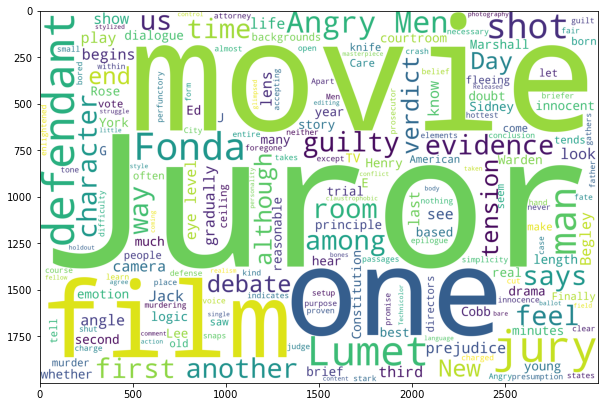

In [86]:
word_cloud1 = WordCloud( background_color = "white",
               width = 3000, height = 2000).generate(df['review_text'][0])
plt.figure(figsize=[10,8])  
plt.imshow(word_cloud1)
word_cloud1.to_file(wordcloud_folder+"/"+'firstworcloud.png');

In [98]:
# Generate wordcloud for all movies
col = 0
for review in df["review_text"]:
    wc = WordCloud( background_color = "white",
               width = 3000, height = 2000).generate(df["review_text"][col])  # create word cloud for each movie
    wc.to_file(wordcloud_folder+"/"+str(df.ranking[col])+'_'+df.title[col]+'.png') # save the word cloud
    col+=1 
    if col > 100:
        break